In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import signal
from utils.vis import ModelInspector, UnitWeightsInspection
from utils.vis import anim_1d_filters, get_unit_weights_inspections
from IPython.display import HTML
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter


Using TensorFlow backend.


In [2]:
data_path = '/home/pjarosik/data/ac/piston/homogenous/simulated'

In [3]:
FS = 100e6 # [Hz]
c = 1540

In [4]:
def trim_close_to_zeros(x):
    # trims LEADING values, which are close to zero
    eps = 1e-10
    nz = np.where(np.abs(x) > eps)[0]
    return x[nz[0]:]

def standardize(x):
    return (x-np.mean(x))/np.std(x)

Read some data.

In [5]:
with h5py.File(os.path.join(data_path, 'att01.mat')) as f:
    rf = f['rf']
    print("Matrix shape: %s" % str(rf.shape))
    print("Data type: %s" % str(rf.dtype))
    # plt.plot(rf)

Matrix shape: (1024, 7107)
Data type: float64


1. filename att{xx}.mat, $\alpha=xx^{-1}$;
1. each file contains 1024 scanlines; each scanline is generated for randomly located points (polar coordinates and depth: (r, $\phi$, z) generated from $U^3$ --> cartesian coordinates)  
1. fs=100e6, c=1540 => depth $\approx$ 50e-3 [m]  

Example scanline ($\alpha$=.1):

In [6]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 19}
matplotlib.rc('font', **font)
figsize = (7, 3)

(7107,)
(1024, 7107)


/home/pjarosik/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


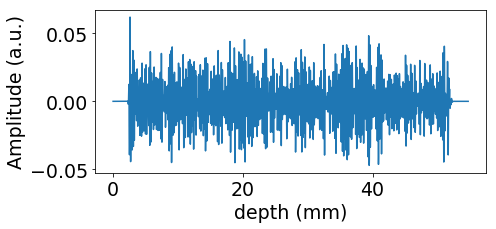

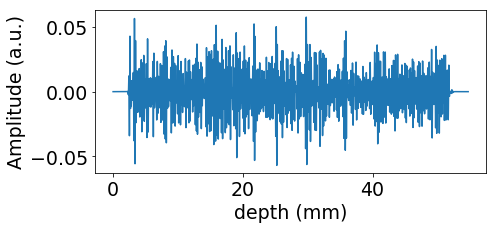

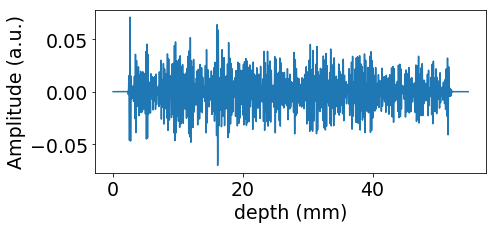

In [7]:
with h5py.File(os.path.join(data_path, 'att01.mat')) as f:
    rf = f['rf']
    steps = np.arange(rf.shape[1])
    steps = steps*((1540/(2*FS))*1e3)
    print(steps.shape)
    print(rf.shape)
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(figsize))
#         line = trim_close_to_zeros(rf[line, :].squeeze())
        line = rf[line, :].squeeze()
        plt.plot(steps[(len(steps)-len(line)):], line)
        plt.ylabel("Amplitude (a.u.)")
        plt.xlabel("depth (mm)")
        plt.savefig("docs/ac01example.pdf", dpi=300, bbox_inches='tight')
        plt.show()

Example scanline ($\alpha$=.5):

(7107,)
(1024, 7107)


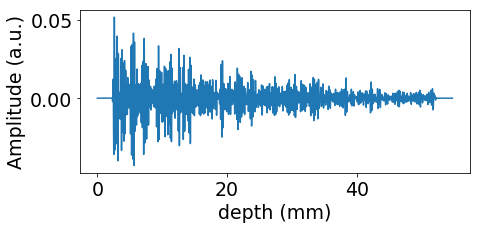

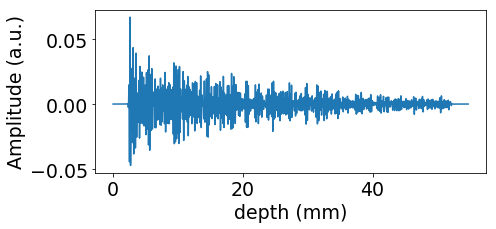

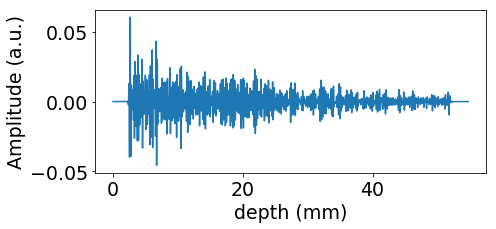

In [8]:
with h5py.File(os.path.join(data_path, 'att05.mat')) as f:
    rf = f['rf']
    steps = np.arange(rf.shape[1])
    steps = steps*((1540/(2*FS))*1e3)
    print(steps.shape)
    print(rf.shape)
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(figsize))
#         line = trim_close_to_zeros(rf[line, :].squeeze())
        line = rf[line, :].squeeze()
        plt.plot(steps[(len(steps)-len(line)):], line)
        plt.ylabel("Amplitude (a.u.)")
        plt.xlabel("depth (mm)")
        plt.savefig("docs/ac05example.pdf", dpi=300, bbox_inches='tight')
        plt.show()

Example scanline ($\alpha$=.7):

(7107,)
(1024, 7107)


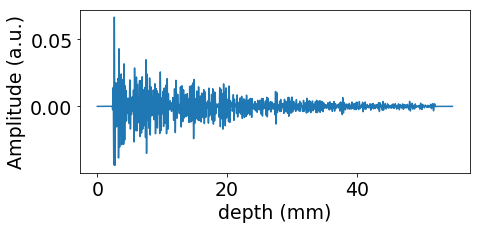

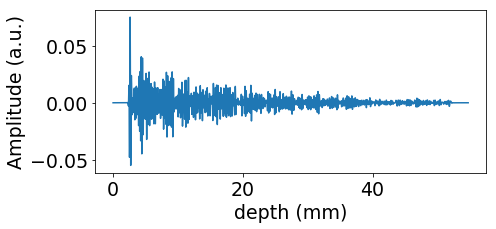

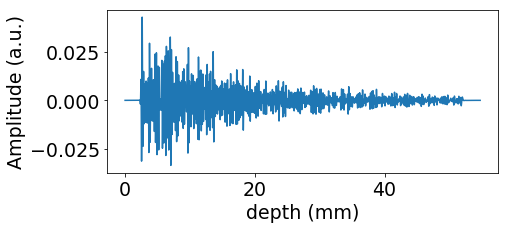

In [9]:
with h5py.File(os.path.join(data_path, 'att07.mat')) as f:
    rf = f['rf']
    steps = np.arange(rf.shape[1])
    steps = steps*((1540/(2*FS))*1e3)
    print(steps.shape)
    print(rf.shape)
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(figsize))
#         line = trim_close_to_zeros(rf[line, :].squeeze())
        line = rf[line, :].squeeze()
        plt.plot(steps[(len(steps)-len(line)):], line)
        plt.ylabel("Amplitude (a.u.)")
        plt.xlabel("depth (mm)")
        plt.savefig("docs/ac07example.pdf", dpi=300, bbox_inches='tight')
        plt.show()

Example scanline ($\alpha$=1.0):

(7107,)
(1024, 7107)


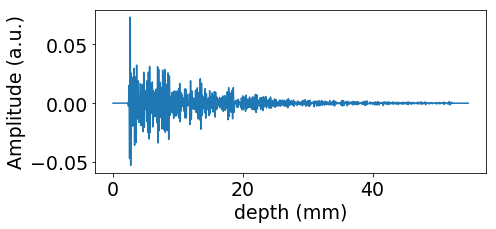

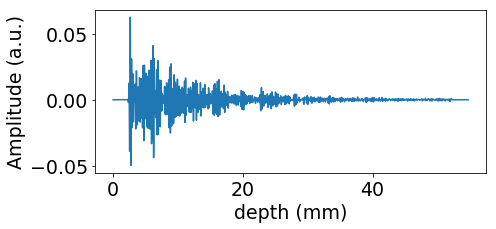

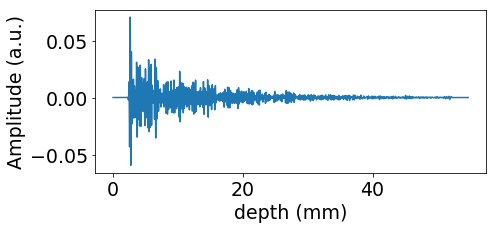

In [10]:
with h5py.File(os.path.join(data_path, 'att10.mat')) as f:
    rf = f['rf']
    steps = np.arange(rf.shape[1])
    steps = steps*((1540/(2*FS))*1e3)
    print(steps.shape)
    print(rf.shape)
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(figsize))
#         line = trim_close_to_zeros(rf[line, :].squeeze())
        line = rf[line, :].squeeze()
        plt.plot(steps[(len(steps)-len(line)):], line)
        plt.ylabel("Amplitude (a.u.)")
        plt.xlabel("depth (mm)")
        plt.savefig("docs/ac10example.pdf", dpi=300, bbox_inches='tight')
        plt.show()

Example scanline ($\alpha$=1.5):

(7107,)
(1024, 7107)


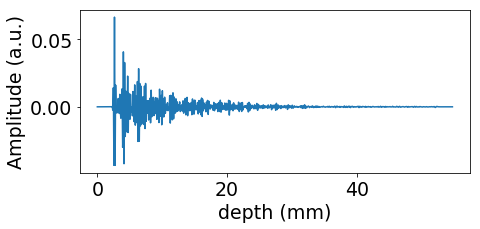

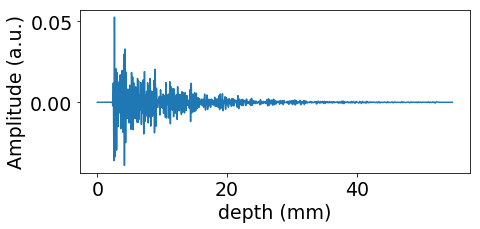

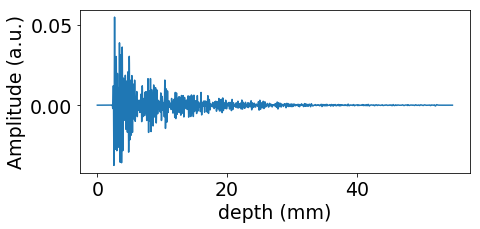

In [11]:
with h5py.File(os.path.join(data_path, 'att15.mat')) as f:
    rf = f['rf']
    steps = np.arange(rf.shape[1])
    steps = steps*((1540/(2*FS))*1e3)
    print(steps.shape)
    print(rf.shape)
    lines = random.sample(range(rf.shape[0]), 3)
    for line in lines:
        plt.figure(figsize=(figsize))
#         line = trim_close_to_zeros(rf[line, :].squeeze())
        line = rf[line, :].squeeze()
        plt.plot(steps[(len(steps)-len(line)):], line)
        plt.ylabel("Amplitude (a.u.)")
        plt.xlabel("depth (mm)")
        plt.savefig("docs/ac15example.pdf", dpi=300, bbox_inches='tight')
        plt.show()

### Signal features

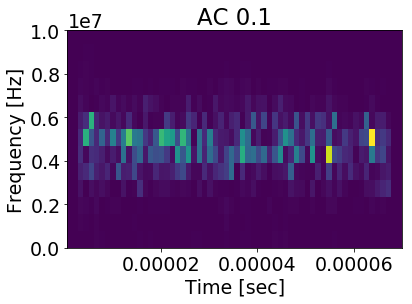

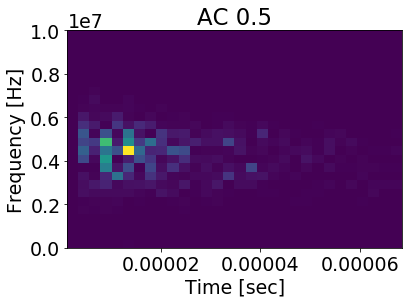

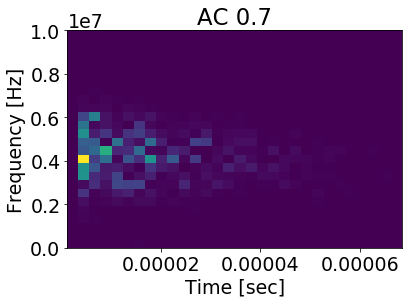

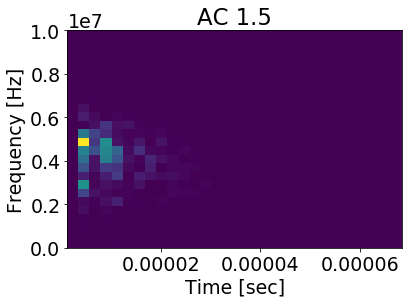

In [12]:
from scipy import signal


with h5py.File(os.path.join(data_path, 'att01.mat')) as f:
    rf = f['rf']
    line = rf[0, :]
    f, t, Sxx = signal.spectrogram(line, fs=FS, nperseg=128)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.ylim([0, 1e7])
    plt.xlabel('Time [sec]')
    plt.title('AC 0.1')
    plt.show()
        
with h5py.File(os.path.join(data_path, 'att05.mat')) as f:
    rf = f['rf']
    line = rf[0, :]
    f, t, Sxx = signal.spectrogram(line, fs=FS)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.ylim([0, 1e7])
    plt.xlabel('Time [sec]')
    plt.title('AC 0.5')
    plt.show()      
    
with h5py.File(os.path.join(data_path, 'att07.mat')) as f:
    rf = f['rf']
    line = rf[0, :]
    f, t, Sxx = signal.spectrogram(line, fs=FS)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.ylim([0, 1e7])
    plt.xlabel('Time [sec]')
    plt.title('AC 0.7')
    plt.show()    
    
with h5py.File(os.path.join(data_path, 'att15.mat')) as f:
    rf = f['rf']
    line = rf[0, :]
    f, t, Sxx = signal.spectrogram(line, fs=FS)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.ylim([0, 1e7])
    plt.xlabel('Time [sec]')
    plt.title('AC 1.5')
    plt.show()

## Chunks

In [13]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 21}
matplotlib.rc('font', **font)
figsize = (7, 3)

Total shape: (138240, 650)
Chunk shape: (9, 650)
Chunk ids: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
line: [7 7 7 7 7 7 7 7 7]


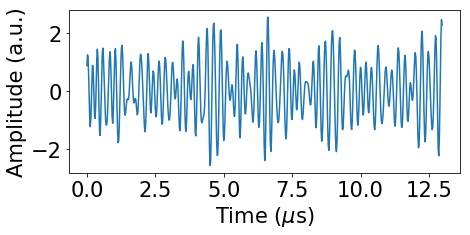

In [14]:
# Check prepared chunks.
# plt.figure(figsize=(30, 10))
chunk_n = 4
att = 1
line_id = 7
# with h5py.File(os.path.join(data_path, 'att%02d.mat') % att, 'r') as f:
#     line = trim_close_to_zeros(f['rf'][line_id])
#     plt.plot(line[chunk_n*650:chunk_n*650+1300])
    
plt.figure(figsize=figsize)    
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    line_ids = ids[chunk_idx]
    print("Chunk shape: %s" % str(line_chunks.shape))
    print("Chunk ids: %s" % str(line_att))
    print("line: %s" % str(line_ids))
    plt.ylabel("Amplitude (a.u.)")
    plt.xlabel("Time ($\mu$s)")
    ch = line_chunks[chunk_n]
    ts = np.arange(len(ch))/(FS/2)
    ts *= 1e6 # ms
    plt.plot(ts, ch)
    plt.savefig("docs/ac01_sample.pdf", dpi=300, bbox_inches='tight')

Total shape: (138240, 650)
Chunk shape: (9, 650)
Chunk ids: [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
line: [6151 6151 6151 6151 6151 6151 6151 6151 6151]


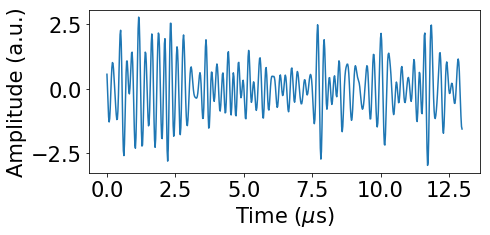

In [15]:
# Check prepared chunks.
# plt.figure(figsize=(30, 10))
chunk_n = 3
att = 7
line_id = 7
# with h5py.File(os.path.join(data_path, 'att%02d.mat') % att, 'r') as f:
#     line = trim_close_to_zeros(f['rf'][line_id])
#     plt.plot(line[chunk_n*650:chunk_n*650+1300])
    
plt.figure(figsize=figsize)    
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    line_ids = ids[chunk_idx]
    print("Chunk shape: %s" % str(line_chunks.shape))
    print("Chunk ids: %s" % str(line_att))
    print("line: %s" % str(line_ids))
    plt.ylabel("Amplitude (a.u.)")
    plt.xlabel("Time ($\mu$s)")
    ch = line_chunks[chunk_n]
    ts = np.arange(len(ch))/(FS/2)
    ts *= 1e6 # ms
    plt.plot(ts, ch)
    plt.savefig("docs/ac07_sample.pdf", dpi=300, bbox_inches='tight')

Total shape: (138240, 650)
Chunk shape: (9, 650)
Chunk ids: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
line: [14669 14669 14669 14669 14669 14669 14669 14669 14669]


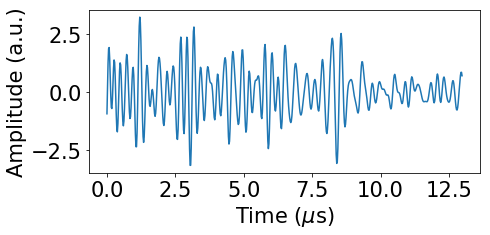

In [16]:
# Check prepared chunks.
# plt.figure(figsize=(30, 10))
chunk_n = 3
att = 15
line_id = 333
# with h5py.File(os.path.join(data_path, 'att%02d.mat') % att, 'r') as f:
#     line = trim_close_to_zeros(f['rf'][line_id])
#     plt.plot(line[chunk_n*650:chunk_n*650+1300])
    
plt.figure(figsize=figsize)    
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    line_ids = ids[chunk_idx]
    print("Chunk shape: %s" % str(line_chunks.shape))
    print("Chunk ids: %s" % str(line_att))
    print("line: %s" % str(line_ids))
    plt.ylabel("Amplitude (a.u.)")
    plt.xlabel("Time ($\mu$s)")
    ch = line_chunks[chunk_n]
    ts = np.arange(len(ch))/(FS/2)
    ts *= 1e6 # ms
    plt.plot(ts, ch)
    plt.savefig("docs/ac15_sample.pdf", dpi=300, bbox_inches='tight')

Total shape: (138240, 650)
Chunk shape: (9, 650)
Chunk ids: [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
line: [14669 14669 14669 14669 14669 14669 14669 14669 14669]


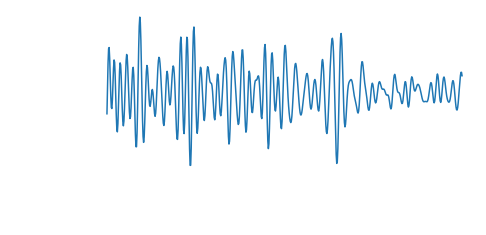

In [24]:
# Check prepared chunks.
# plt.figure(figsize=(30, 10))
chunk_n = 3
att = 15
line_id = 333
# with h5py.File(os.path.join(data_path, 'att%02d.mat') % att, 'r') as f:
#     line = trim_close_to_zeros(f['rf'][line_id])
#     plt.plot(line[chunk_n*650:chunk_n*650+1300])
    
plt.figure(figsize=figsize)    
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    line_ids = ids[chunk_idx]
    print("Chunk shape: %s" % str(line_chunks.shape))
    print("Chunk ids: %s" % str(line_att))
    print("line: %s" % str(line_ids))
    plt.ylabel("Amplitude (a.u.)")
    plt.xlabel("Time ($\mu$s)")
    ch = line_chunks[chunk_n]
    ts = np.arange(len(ch))/(FS/2)
    ts *= 1e6 # ms
    plt.plot(ts, ch)
    plt.axis("off")
    plt.savefig("docs/ac15_sample_no_axis.pdf", dpi=300, bbox_inches='tight')

#### spectral content

##### 1cm

Total shape: (138240, 650)
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


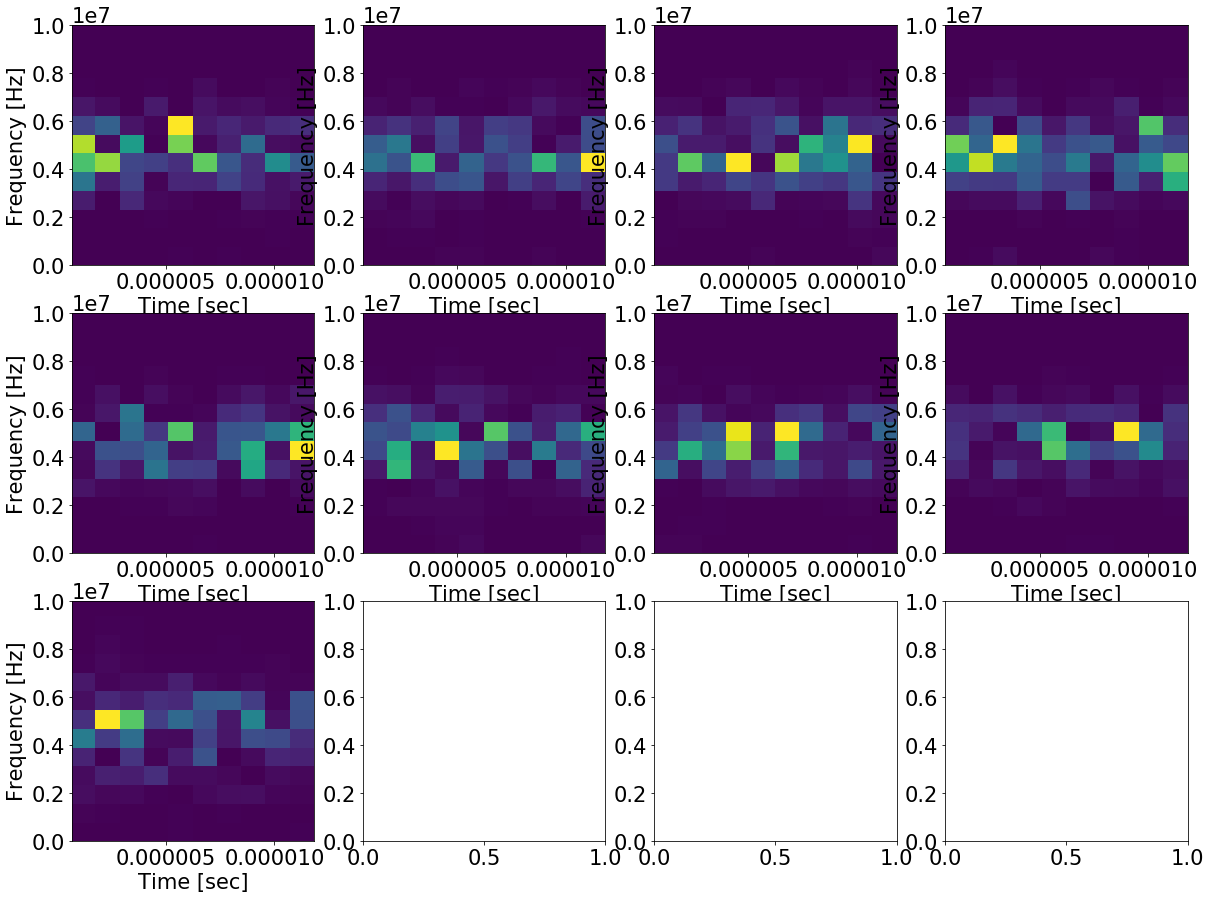

In [17]:
att = 1
line_id = 3
chunk_number = 1

with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    print(line_att)
    fig, axes = plt.subplots((line_chunks.shape[0]-1)//4+1, 4)
    fig.set_size_inches((20, 15))
    # 7//4 => 2
    # 8//4 => 2
    # 9//4 => 3
    for i, chunk in enumerate(line_chunks):
        f, t, Sxx = signal.spectrogram(chunk, fs=FS/2, nperseg=64)
        ax = axes.flatten()[i]
        ax.pcolormesh(t, f, Sxx)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_ylim([0, 1e7])
        ax.set_xlabel('Time [sec]')
    plt.show()

In [18]:
figsize = (7, 3)

Total shape: (138240, 650)
8.288698953543988e-07
9.1168


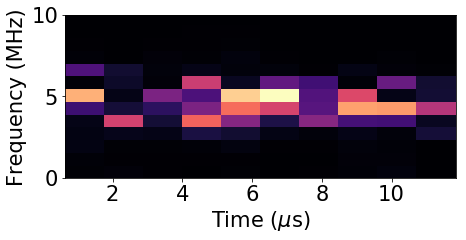

In [19]:
att = 1
line_id = 7
chunk_number = 4
plt.figure(figsize=figsize)
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    chunk = line_chunks[chunk_number]
    f, t, Sxx = signal.spectrogram(chunk, fs=FS/2, nperseg=64)
    print(np.max(Sxx))
    print(np.max(t*1540*1000/2))
    plt.pcolormesh(t*1e6, f/10e5, Sxx, cmap = 'magma')
    plt.ylabel('Frequency (MHz)')
    plt.ylim([0, 10])
    plt.xlabel('Time ($\mu$s)')
#     plt.colorbar()
    plt.savefig("docs/ac01_sample_spectrogram.pdf", dpi=300, bbox_inches='tight')
    plt.show()

Total shape: (138240, 650)


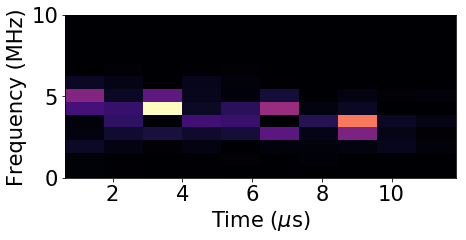

In [20]:
att = 15
line_id = 333
chunk_number = 3
plt.figure(figsize=figsize)
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    chunk = line_chunks[chunk_number]
    f, t, Sxx = signal.spectrogram(chunk, fs=FS/2, nperseg=64)
    plt.pcolormesh(t*1e6, f/10e5, Sxx, cmap='magma')
    plt.ylabel('Frequency (MHz)')
    plt.ylim([0, 10])
    plt.xlabel('Time ($\mu$s)')
#     cbar = plt.colorbar()
#     cbar.formatter.set_powerlimits((0, 0))
#     cbar.update_ticks()
    plt.savefig("docs/ac15_sample_spectrogram.pdf", dpi=300, bbox_inches='tight')
    plt.show()

Total shape: (138240, 650)


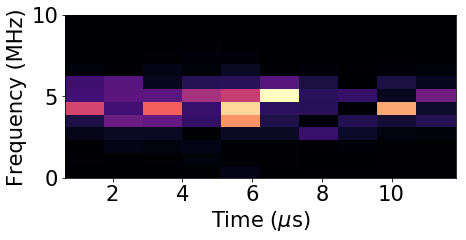

In [21]:
att = 7
line_id = 444
chunk_number = 2
plt.figure(figsize=figsize)
with h5py.File(os.path.join(data_path, '1cm_dec2_regr.hdf5'), 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    chunk = line_chunks[chunk_number]
    f, t, Sxx = signal.spectrogram(chunk, fs=FS/2, nperseg=64)
    plt.pcolormesh(t*1e6, f/10e5, Sxx, cmap="magma")
    plt.ylabel('Frequency (MHz)')
    plt.ylim([0, 10])
    plt.xlabel('Time ($\mu$s)')
#     cbar = plt.colorbar()
#     cbar.formatter.set_powerlimits((0, 0))
#     cbar.update_ticks()
    plt.savefig("docs/ac07_sample_spectrogram.pdf", dpi=300, bbox_inches='tight')
    plt.show()

In [22]:
att = 1
line_id = 3
chunk_number = 1

with h5py.File('/home/pjarosik/data/simulated/piston/1cm.hdf5', 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    print(line_att)
    fig, axes = plt.subplots((line_chunks.shape[0]-1)//4+1, 4)
    fig.set_size_inches((20, 15))
    # 7//4 => 2
    # 8//4 => 2
    # 9//4 => 3
    for i, chunk in enumerate(line_chunks):
        f, t, Sxx = signal.spectrogram(chunk, fs=FS, nperseg=128)
        ax = axes.flatten()[i]
        ax.pcolormesh(t, f, Sxx)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_ylim([0, 1e7])
        ax.set_xlabel('Time [sec]')
    plt.show()

OSError: Unable to open file (unable to open file: name = '/home/pjarosik/data/simulated/piston/1cm.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
att = 15
line_id = 3
chunk_number = 1

with h5py.File('/home/pjarosik/data/simulated/piston/1cm.hdf5', 'r') as f:
    X, y, ids = f['X'], f['y'], f['ids'][:] # [:] - memory may blow up!
    print("Total shape: %s" % str(X.shape))
    chunk_idx = np.where(ids == ((att-1)*1024+line_id))[0].tolist()
    line_chunks = X[chunk_idx]
    line_att = y[chunk_idx]
    print(line_att)
    fig, axes = plt.subplots((line_chunks.shape[0]-1)//3+1, 3)
    fig.set_size_inches((20, 15))
    # 7//4 => 2
    # 8//4 => 2
    # 9//4 => 3
    for i, chunk in enumerate(line_chunks):
        f, t, Sxx = signal.spectrogram(chunk, fs=FS, nperseg=128)
        ax = axes.flatten()[i]
        cm = ax.pcolormesh(t, f, Sxx)
        plt.colorbar(cm, ax=ax)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_ylim([0, 1e7])
        ax.set_xlabel('Time [sec]')
    plt.show()